<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/10LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded=files.upload()

Saving model_lr.png to model_lr (1).png


**Binary Classification using Logistic Rgression** 


1. Logistic Regression is statistical model that uses Logistic Function to model a binary classification problem
2. Logistic function takes values either 0 or 1 when parameter is very large or small.
3. In Logistic Rgression, we intend to estimate the model parameters such that the probability of the output is true given the input features.  

$\hat{y}=P(y=1|x)$

The probability is always between 0 and 1. So,

$0 \le \hat{y} \le 1$



**Setting up Problem**.  

We will use $\mathbf{𝐱_𝐢}$  to denote the feature vector and  $\mathbf{𝐲_𝐢}$  to denote output variable.  
Let,  
$m$ : training examples  
$nx$ : Number of features  

Let us write $z$ for the output as linear combinations of weights and input features.

$z^{(i)} = w_1x^{(i)}_1+w_2x^{(i)}_2+.....+w_{nx}x^{(i)}_{nx}+b $   

Feature vector for $i^{th}$ training example:
$\mathbf{x}^{(i)} =\begin{pmatrix}
  {x}_1^{(i)} \\ {x}_2^{(i)} \\ \vdots \\ {x}_{nx}^{(i)}
 \end{pmatrix} $   

Output vector of $i^{th}$ training example:   $y^{(i)}$ = (0 or 1) 

Feature vector of the problem dataset:   

$ \mathbf{X} = \begin{pmatrix}
\mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \cdots & \mathbf{x}^{(i)}
\end{pmatrix}$   

$ \mathbf{X} = \begin{pmatrix}
{x}_1^{(1)} & {x}_1^{(2)} & \cdots & {x}_1^{(m)} \\ 
{x}_2^{(1)} & {x}_2^{(2)} & \cdots & {x}_2^{(m)} \\ 
\vdots & \vdots & \cdots & \vdots \\ 
{x}_{nx}^{(1)} & {x}_{nx}^{(1)} & \cdots & {x}_{nx}^{(m)}
\end{pmatrix}$

Parameter vector :
$\mathbf{w} =\begin{pmatrix}
  {w}_1 \\ {w}_2 \\ \vdots \\ {w}_{nx}
 \end{pmatrix}, b $   

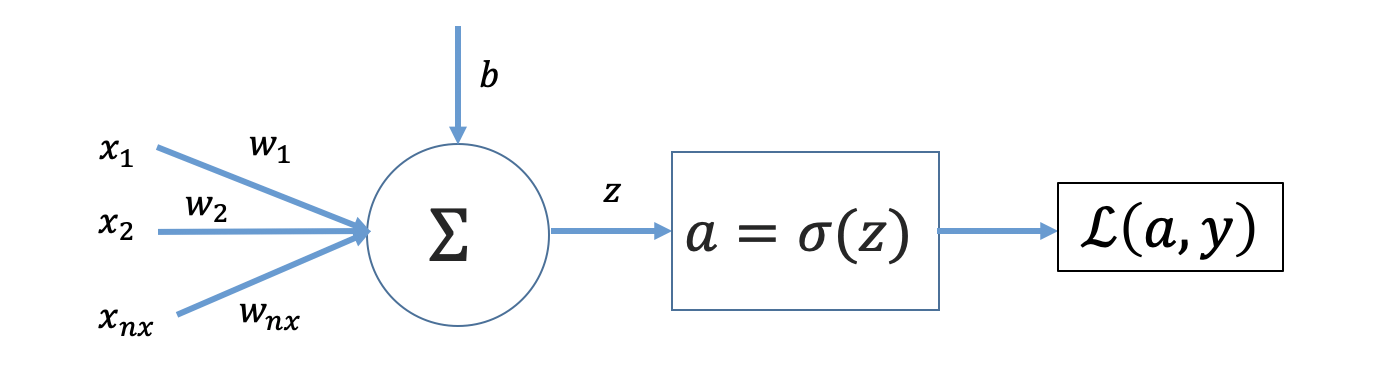

In [18]:
Image('model_lr.png', width=600)


$z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b$  

$\hat{y}^{(i)} = a^{(i)} = σ (z^{(i)}) = \frac {1}{1+e^{-z^{(i)}}}$  

The squared error function for the logistic function may result in non-convex function and hence the other function is used as loss function for as below:

$$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$  

The above cost function is covex and hence we can have a global minima.

The sum of all the loss over entire training set is called the cost. The cost function is therefore computed by summing over all training examples:  

$$J(\mathbf{w},b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$


$$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$$

The cost is to be minimized and the optimum parameters are to be evaluated. We can use gradient descent. The update rule is as below:  

$ \mathbf{w} = \mathbf{w} - \alpha \frac {\partial J}{\partial \mathbf{w}}$  

$ b = b - \alpha \frac {\partial J}{\partial b}$  

Where,  
        $ \alpha$ : Learning Rate (0.0001, 0.001, 0.01...)

The goal is to learn $w$ and $b$ by minimizing the cost function $J$


**Gradient Descent**.  

To understand the basics of the gradient descent, let us consider one training example and multiple features. Then we can write the forward propogation equations by dropping the superscript $i$:

$z = w_1x_1+w_2x_2+.....+w_{nx}x_{nx}+b $  

$a = \frac {1}{1+e^{-z}}$  

$\mathcal{L}(a, y) =  - y \log(a) - (1-y) \log(1-a)$  

To find the upated values of the parameters, we have to find the gradients $ \frac{\partial \mathcal{L}(a, y)}{\partial w_j}$, $ \frac{\partial \mathcal{L}(a, y)}{\partial b}$.

The loss function is a function of $a$ and $y$, so we have to use chain rule going backward from the last step to first step.   

Note that $a$ is a function of $z$ and $z$ is a function of $w$.

$\frac{\partial \mathcal{L}(a, y)}{\partial w_j}= \frac{\partial \mathcal{L}(a, y)}{\partial a} \frac{\partial a}{\partial z}  \frac{\partial z}{\partial w_j}$

Let us try to evaluate the each term separately.  

$\frac{\partial \mathcal{L}(a, y)}{\partial a}=-\frac {y}{a}+\frac {(1-y)}{(1-a)}$ 

$ \frac{\partial a}{\partial z}=\frac{\partial }{\partial z} (\frac {1}{1+e^{-z}}) = \frac {e^{-z}}{(1+e^{-z})^2}=\frac {1}{1+e^{-z}}\frac {1+e^{-z}-1}{1+e^{-z}} =a(\frac {1+e^{-z}}{1+e^{-z}} - \frac {1}{1+e^{-z}})$

$ \frac{\partial a}{\partial z}=a(1-a)$

$ \frac{\partial z}{\partial w_j}=x_j$

$\frac{\partial \mathcal{L}(a, y)}{\partial w_j}= x_j(a-y)$

Similarly, 

$\frac{\partial \mathcal{L}(a, y)}{\partial b}= (a-y)$


Let us expand the expressions for $m$ training examples by taking the mean of the sum over all the training examples

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m} \sum \limits _{i=1} ^m (a^{(i)}-y^{(i)}){x}^{(i)}_j$$  

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum \limits _{i=1} ^m (a^{(i)}-y^{(i)})$$

In matrix form,  
$$ \frac{\partial J}{\partial \mathbf{w}} = \frac{1}{m}\mathbf {X(a-y)}^T$$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$